# Train LeNet5 on MNIST dataset using TensorFlow

### Notebook setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from dataset import MNISTDataset
from utils import Utils
from lenet5 import Lenet5

# numpy print options
np.set_printoptions(linewidth = 150)
np.set_printoptions(edgeitems = 10)

### Set seed

In [3]:
# create a random generator using a constant seed in order to reproduce results
seed = 112358
nprg = np.random.RandomState(seed)

### Import MNIST dataset

In [4]:
MNIST_TRAIN_IMAGES_FILEPATH = 'MNIST_dataset/train-images.idx3-ubyte'
MNIST_TRAIN_LABELS_FILEPATH = 'MNIST_dataset/train-labels.idx1-ubyte'
MNIST_TEST_IMAGES_FILEPATH = 'MNIST_dataset/t10k-images.idx3-ubyte'
MNIST_TEST_LABELS_FILEPATH = 'MNIST_dataset/t10k-labels.idx1-ubyte'

mnist_ds = MNISTDataset(MNIST_TRAIN_IMAGES_FILEPATH, 
                        MNIST_TRAIN_LABELS_FILEPATH,
                        MNIST_TEST_IMAGES_FILEPATH,
                        MNIST_TEST_LABELS_FILEPATH)


### Data augmentation

In [ ]:
mnist_ds.enhance_with_random_rotate(ratio = 2)

In [ ]:
mnist_ds.enhance_with_random_zoomin(ratio = 2)

In [ ]:
mnist_ds.enhance_with_random_zoomin_and_rotate(ratio = 2)

### Analyze dataset

In [5]:
print(mnist_ds.summary)


        training data set: images = (54000, 28, 28, 1), labels = (54000, 10)
        validation data set: images = (6000, 28, 28, 1), labels = (6000, 10)
        testing data set: images = (10000, 28, 28, 1), labels = (10000, 10)
        


In [6]:
def plot_images_sample(images, image_size, labels, nlines, ncols):
    plt.figure(figsize=(8, 3), dpi = 150)
    train_sample_indices = np.random.choice(a = dataset.num_examples, size = nlines * ncols, replace=False)
    plt.imshow(Utils.concat_images(images[train_sample_indices], image_size, nlines, ncols), cmap='gray_r')
    plt.title(str(np.argmax(labels[train_sample_indices], axis=1).reshape(nlines, ncols)), fontsize=8)
    plt.show()

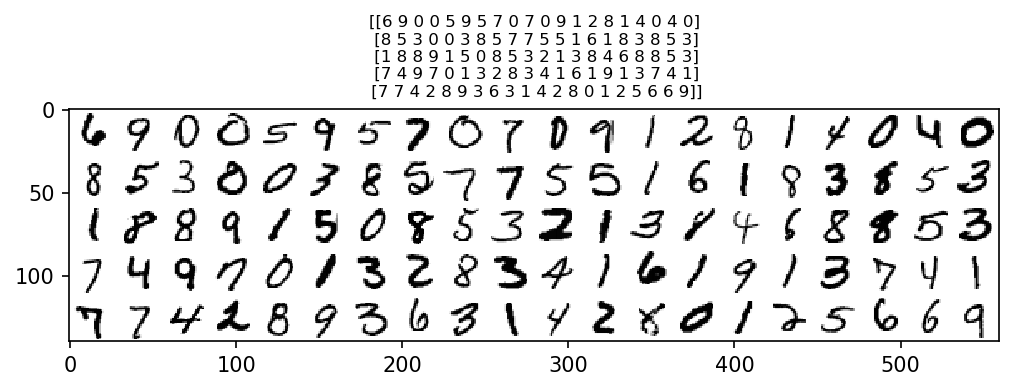

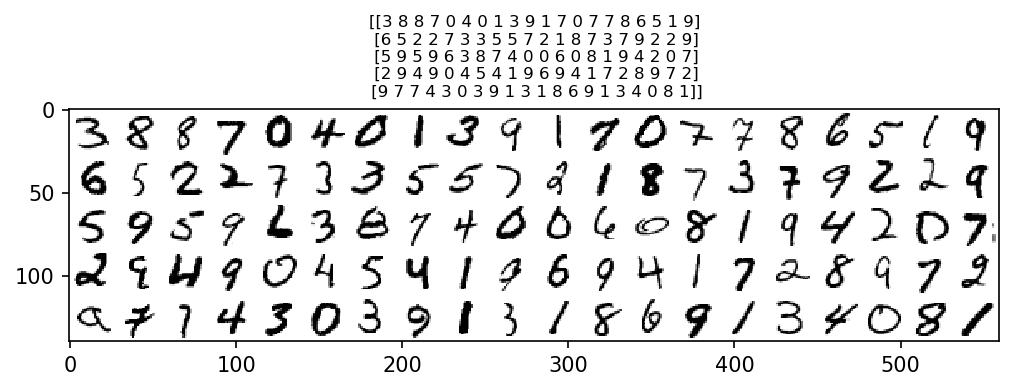

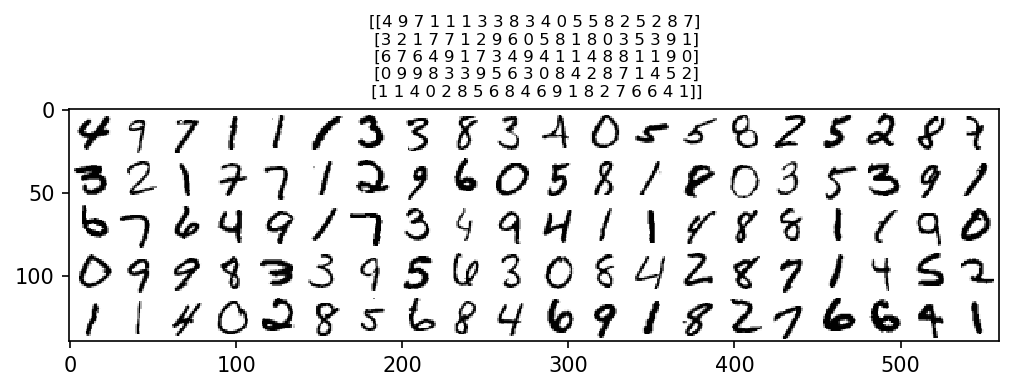

In [7]:
# plot a sample from each train, validation and test set
for dataset in [mnist_ds.train, mnist_ds.validation, mnist_ds.test]:  
    plot_images_sample(dataset.images, mnist_ds.image_size, dataset.labels, nlines=5, ncols=20)

In [8]:
# plot label distribution of each train, validation and test set
def plot_label_distribution(labels, title=None):
    plt.figure(figsize=(20, 5))
    plt.hist(labels, bins=np.arange(11), align='left', rwidth=0.5, normed=False)
    plt.xticks(range(0, 10))
    plt.xlabel('digit')
    plt.ylabel('frequency')
    if title is not None:
        plt.title(title)
    plt.show()

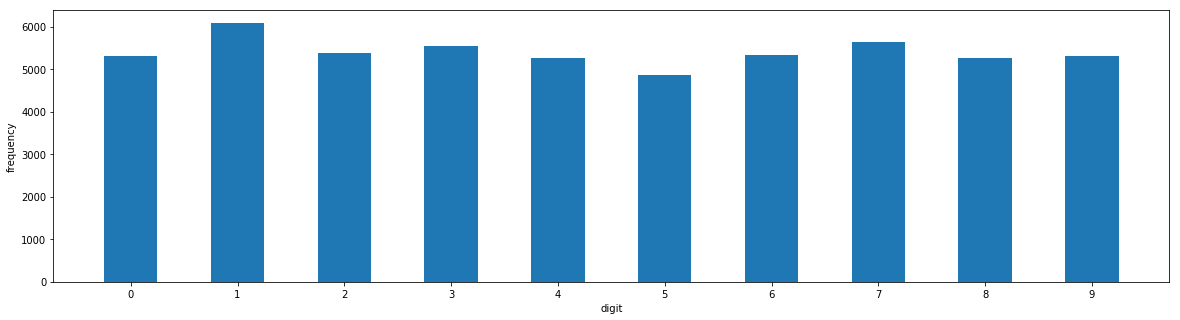

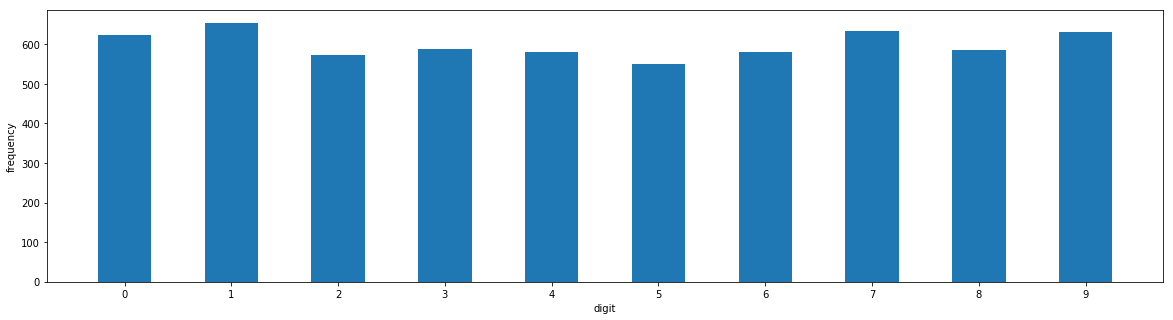

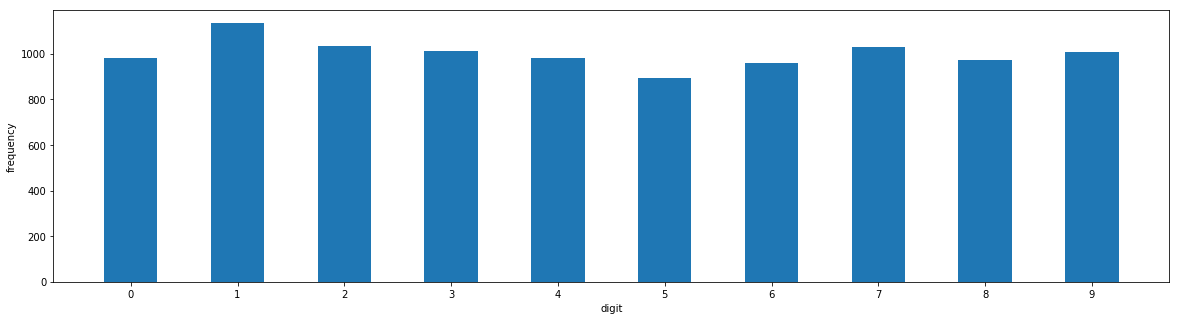

In [9]:
for dataset in [mnist_ds.train, mnist_ds.validation, mnist_ds.test]:
    plot_label_distribution(np.argmax(dataset.labels, axis=1))

### Train LeNet5 model using TensorFlow

In [10]:
lenet5_model = Lenet5(mnist_ds, "zoomin_and_rotate_x2_allDigits_dropoutAfterF5F6",
              epochs=40, batch_size=128, variable_mean=0, variable_stddev=0.1,
              learning_rate=0.001,
              drop_out_keep_prob=0.5)

2018-02-15 08:46:23,014 - 
        training data set: images = (54000, 28, 28, 1), labels = (54000, 10)
        validation data set: images = (6000, 28, 28, 1), labels = (6000, 10)
        testing data set: images = (10000, 28, 28, 1), labels = (10000, 10)
        


In [ ]:
lenet5_model.train()

### Analyze results

In [29]:
# test a previous trained method on all test examples using test_data method
temp = Lenet5(mnist_ds,"temp")
temp.restore_session(ckpt_dir='./results/', ckpt_filename='Lenet5_allDigits_dropoutAfterF5F6_2018_02_10_02_59.model.ckpt')
test_loss, test_acc, total_predict, total_actual, wrong_predict_images = temp.test_data(mnist_ds.test)
print('test_loss = {:.3f}, test_acc = {:.3f} ({}/{})'.format(test_loss,test_acc, mnist_ds.test_size - len(wrong_predict_images), mnist_ds.test_size))

2018-02-15 08:57:27,651 - 
        training data set: images = (54000, 28, 28, 1), labels = (54000, 10)
        validation data set: images = (6000, 28, 28, 1), labels = (6000, 10)
        testing data set: images = (10000, 28, 28, 1), labels = (10000, 10)
        
test_loss = 0.110, test_acc = 0.981 (9812/10000)


In [28]:
# sort wrong_predict_images by target label and plot them to file
wrong_predict = total_predict[total_actual != total_predict]
wrong_actual = total_actual[total_actual != total_predict]
wrong_predict_images = np.array(wrong_predict_images)
wrong_predict_images_sorted = wrong_predict_images[wrong_actual.argsort(), ]
wrong_predict_images_sorted = [image for image in wrong_predict_images_sorted]
from training_plotter import TrainingPlotter
TrainingPlotter.combine_images(wrong_predict_images_sorted, "wrong_predicted_after_restore_session.png")

### Test the model  on a sample of images

In [30]:
# choose all test images as sample
test_sample_size = mnist_ds.test_size
test_sample_images, test_sample_labels = mnist_ds.test.images, mnist_ds.test.labels

In [18]:
# or choose a sample w.r.t. a given distribution
print(mnist_ds.test.counts_per_class)
test_sample_size = 1009
test_sample_weights = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1]
test_sample_images, test_sample_labels = mnist_ds.test.next_batch(test_sample_size, weights = test_sample_weights)

[ 980 1135 1032 1010  982  892  958 1028  974 1009]
num_examples_from_each_class =  [   0    0    0    0    0    0    0    0    0 1009]
start_indices =  [0 0 0 0 0 0 0 0 0 0]
end_indices =  [   0    0    0    0    0    0    0    0    0 1009]
(1009, 28, 28, 1)


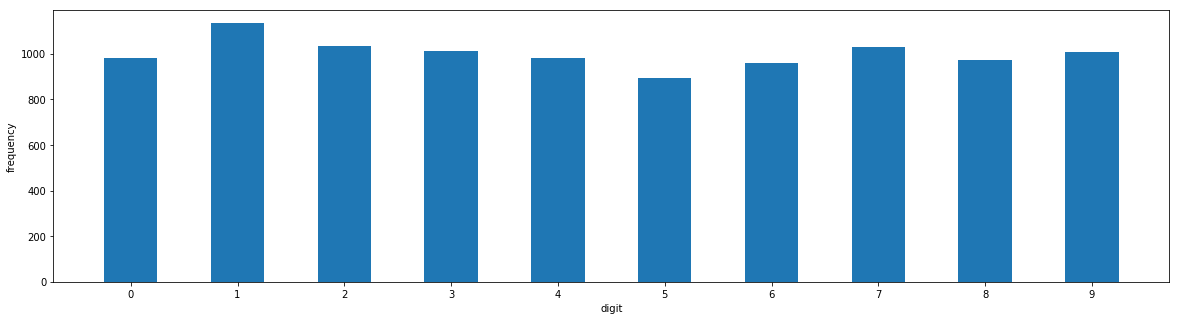

In [31]:
# plot sample's label distribution
plot_label_distribution(labels=np.argmax(test_sample_labels, axis=1))

In [33]:
# test using predict_images method
temp_model = Lenet5(mnist_ds,"temp")
temp_model.restore_session(ckpt_dir='./results/', ckpt_filename='Lenet5_allDigits_dropoutAfterF5F6_2018_02_10_02_59.model.ckpt')
preds = temp_model.predict_images(test_sample_images)
target_labels = np.argmax(test_sample_labels, axis=1)
predicted_labels = np.argmax(preds, axis=1)
count_correct_predicted = np.sum(target_labels == predicted_labels)
print('Accuracy: {:.3f} ({}/{})'.format(count_correct_predicted / test_sample_size, count_correct_predicted, test_sample_size))

2018-02-15 08:58:25,987 - 
        training data set: images = (54000, 28, 28, 1), labels = (54000, 10)
        validation data set: images = (6000, 28, 28, 1), labels = (6000, 10)
        testing data set: images = (10000, 28, 28, 1), labels = (10000, 10)
        
Accuracy: 0.981 (9812/10000)


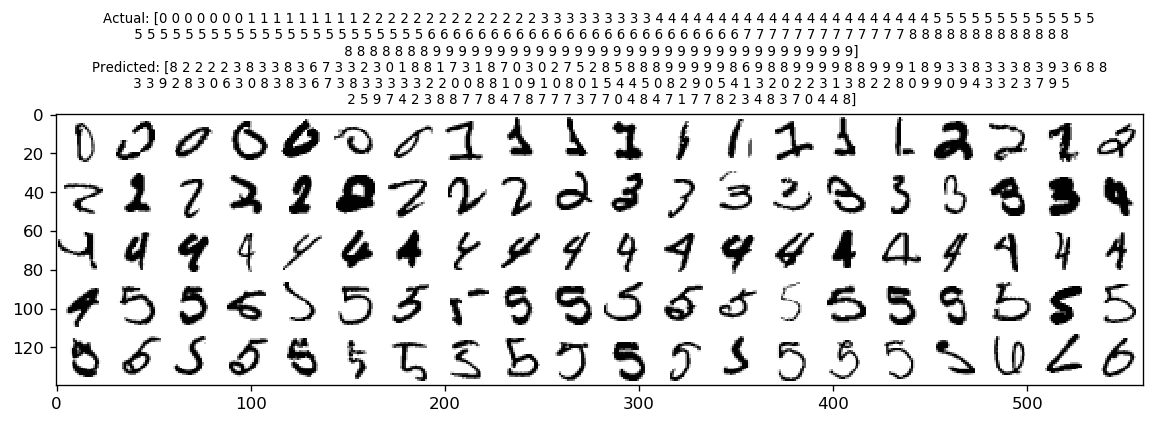

In [34]:
# sort wrong_predict_images by target label and plot them
wrong_predict = predicted_labels[target_labels != predicted_labels]
wrong_actual = target_labels[target_labels != predicted_labels]
wrong_predicted_images = test_sample_images[target_labels != predicted_labels]
wrong_predict_images_sorted = wrong_predicted_images[wrong_actual.argsort()]
wrong_actual_sorted = wrong_actual[wrong_actual.argsort()]
wrong_predict_sorted = wrong_predict[wrong_actual.argsort()]

plt.figure(figsize=(15, 3), dpi = 120)
plt.imshow(Utils.concat_images(wrong_predict_images_sorted, mnist_ds.image_size, num_images_on_x = 5, num_images_on_y = 20), cmap='gray_r')
plt.title("Actual: {}\nPredicted: {}".format(np.array(wrong_actual_sorted), str(wrong_predict_sorted)), fontsize = 8)
plt.show()

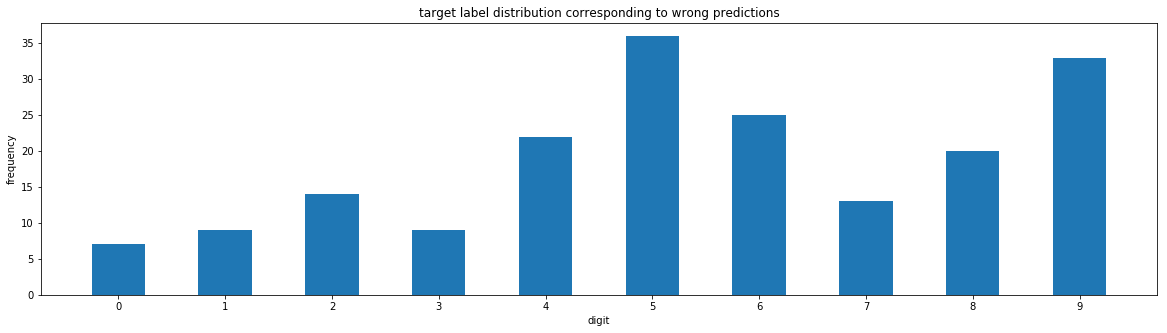

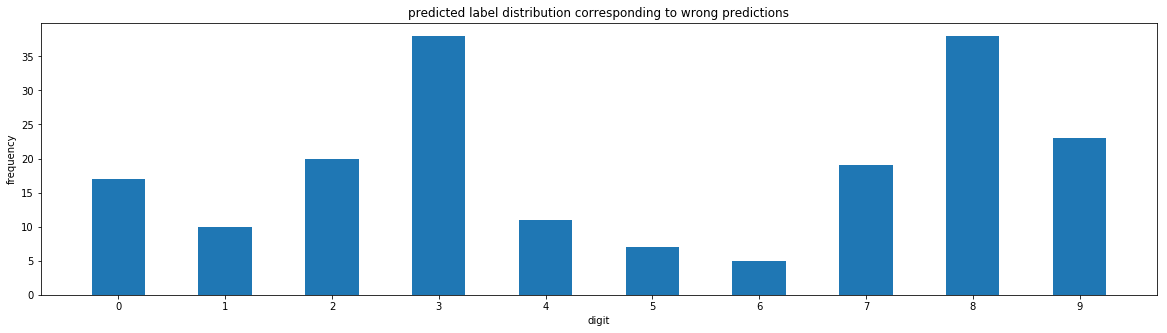

In [35]:
# print target and predicted label distributions of wrong predicted examples
plot_label_distribution(labels=wrong_actual, title='target label distribution corresponding to wrong predictions')
plot_label_distribution(labels=wrong_predict, title='predicted label distribution corresponding to wrong predictions')